# Base de datos

La base de datos fue tomada del siguiente repositorio https://www.kaggle.com/ruslankl/mice-protein-expression y corresponde a los niveles de expresión de 77 proteinas de la corteza cerebral de ratones. Las clases son las siguientes:

- c-CS-s: ratones de control, estimulados para aprender, inyectados con solución salina (9 ratones) 
- c-CS-m: ratones de control, estimulados para aprender, inyectados con memantina (10 ratones) 
- c-SC-s: ratones de control, no estimulados para aprender, inyectados con solución salina (9 ratones) 
- c-SC-m: ratones de control, no estimulados para aprender, inyectados con memantina (10 ratones) 
- t-CS-s: ratones con trisomía, estimulados para aprender, inyectados con solución salina (7 ratones) 
- t-CS-m: ratones con trisomía, estimulados para aprender, inyectados con memantina (9 ratones) 
- t-SC-s: ratones con trisomía, no estimulados para aprender, inyectados con solución salina (9 ratones) 
- t-SC-m: ratones con trisomía, no estimulados para aprender, inyectados con memantina (9 ratones)

Las ocho clases de ratones se describen en función de características como el genotipo, el comportamiento y el tratamiento. Según el genotipo, los ratones pueden ser de control o trisómicos. Según el comportamiento, algunos ratones han sido estimulados para aprender (shock de contexto) y otros no (contexto de shock) y para evaluar el efecto del medicamento memantina en la recuperación de la capacidad de aprender en ratones trisómicos, algunos ratones han sido inyectado con la droga y otros no.

Se tomaron 15 muestras para cada ratón dando como resultado un total de 1080 muestras. 

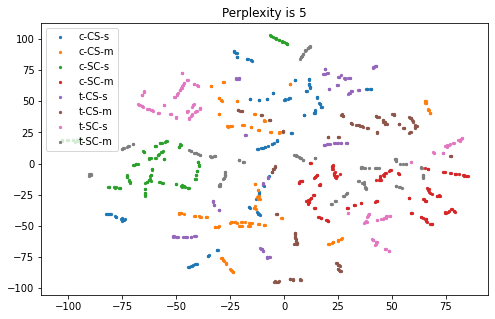

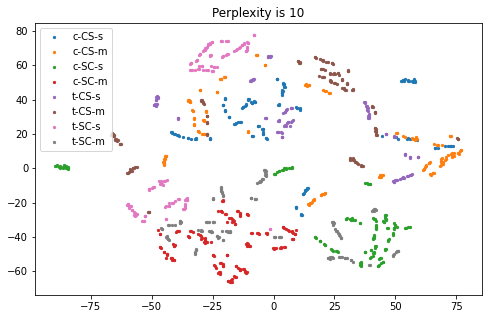

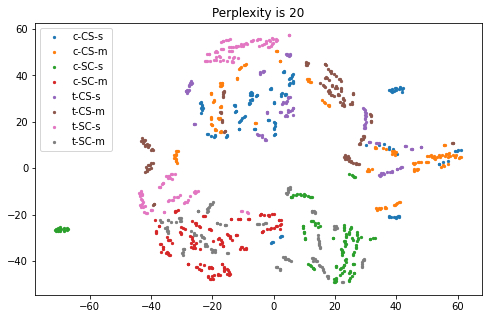

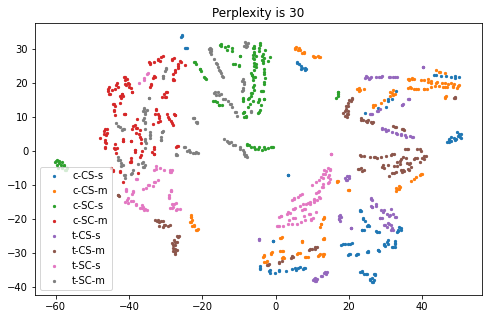

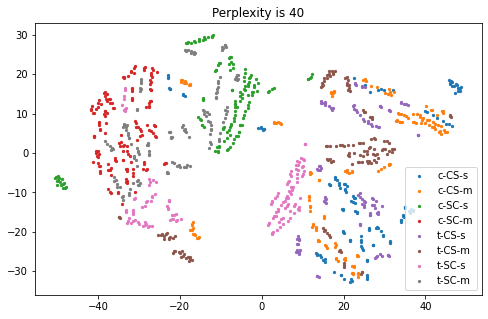

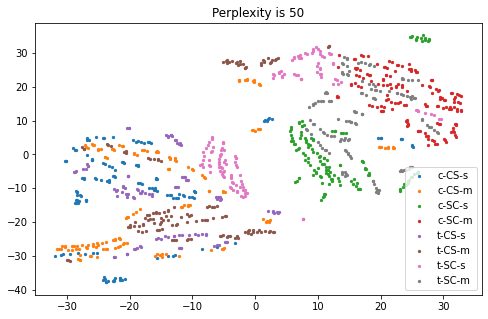

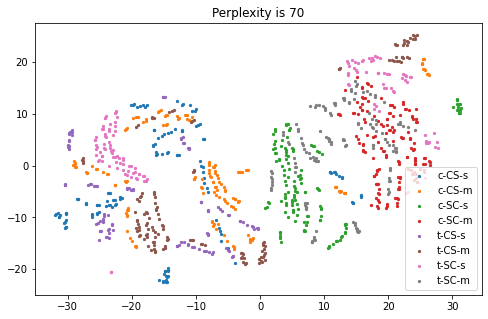

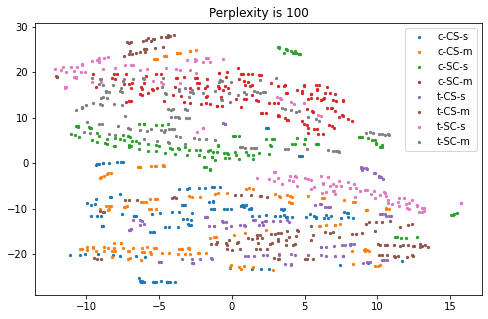

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.manifold
import sklearn.datasets
import glob
import sklearn.cluster
import pandas as pd # para leer datos

data = pd.read_csv('Data_Cortex_Nuclear.csv', index_col = 0)
data = data.replace(np.nan, 0)
predictors = list(data.keys())
predictors.remove('Genotype')
predictors.remove('Treatment')
predictors.remove('Behavior')
predictors.remove('class')
X  = data[predictors]
clase1 = {'c-CS-s':1,'c-CS-m':2,'c-SC-s':3,'c-SC-m':4,
         't-CS-s':5,'t-CS-m':6,'t-SC-s':7,'t-SC-m':8}

Y = [clase1[item] for item in data['class']] 


per = np.array([5,10,20,30,40,50,70,100])
for j in per:
    tsne = sklearn.manifold.TSNE(perplexity=j)
    tsne.fit(X)
    embedding = tsne.embedding_
    plt.figure(figsize=(8, 5))
    for i in clase1:
        key = clase1[i]
        plt.scatter(embedding[np.where(np.asarray(Y) == key),0], 
                    embedding[np.where(np.asarray(Y) == key),1], label = i, s=5.0)
    plt.title('Perplexity is %i'%j)
    plt.legend()

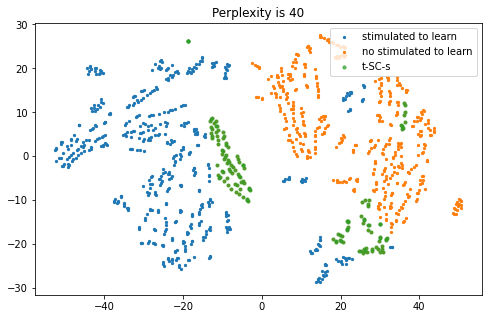

In [58]:
clase2 = {'c-CS-s':1,'c-CS-m':1,'c-SC-s':2,'c-SC-m':2,
         't-CS-s':1,'t-CS-m':1,'t-SC-s':2,'t-SC-m':2}
nombre_clase2 = {'stimulated to learn':1, 'no stimulated to learn':2}

Y2 = [clase2[item] for item in data['class']] 

tsne = sklearn.manifold.TSNE(perplexity=40)
tsne.fit(X)
embedding = tsne.embedding_
plt.figure(figsize=(8, 5))
for i in nombre_clase2:
    key = nombre_clase2[i]
    plt.scatter(embedding[np.where(np.asarray(Y2) == key),0], 
                embedding[np.where(np.asarray(Y2) == key),1], label = i, s=5.0)
plt.scatter(embedding[np.where(np.asarray(Y) == 7),0], 
                embedding[np.where(np.asarray(Y) == 7),1], label = 't-SC-s', s=10.0, alpha = 0.7)
plt.title('Perplexity is %i'%40)
plt.legend()

## Resultados reducción de dimensionalidad con tsne

Los resultados indican que no hay una diferencia entre ninguno de los grupos de tratamiento y control. Sin embargo, los ratones que si fueron estimulados para aprender y los que no parecen dividirse en dos grupos sin importar si tienen o no Sindrome de Down o si fueron inyectados con solución salina o con memantina. Sin embargo, es importante resaltar que algunos de los ratones con sindrome de Down que no fueron estimulados y que ademas fueron inyectados con solución salina, parecen estar mas cercano a tener una expresión proteica similar a los ratones que fueron estimulados a aprender, es dificil saber con certeza porque se dan estos resultados, sin embargo una de las posibles razones es que al realizar la inyección de la solución algunos de los ratones se pudieron estresar, cambiando el perfil de expresión que estaban mostrando antes de la inyección. 

Respecto a los resultados de perplejidad, los clusters muestran ser mas definidos desde que la perplejidad es 30, pero dejan de serlo cuando esta aumenta a 70. De acuerdo con la documentación de scikit learn, la perplejidad está relacionada con el número de vecinos más cercanos que se utiliza en otros algoritmos de aprendizaje múltiples. Es por esta razón que los conjuntos de datos más grandes generalmente requieren una mayor perplejidad, lo que explica los resultados de tener perplejidades inferiores a 30, así mismo, el rango aceptable para estos datos parece encontrarse entre [30-70).


# Clustering

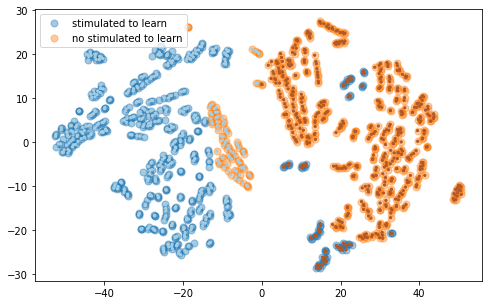

In [105]:
n_clusters = 2
k_means = sklearn.cluster.KMeans(n_clusters=n_clusters)
k_means.fit(embedding) # training
cluster = k_means.predict(embedding) # predice a cual cluster corresponde cada elmento
distance = k_means.transform(embedding) 
plt.figure(figsize=(8, 5))
for i in nombre_clase2:
    key = nombre_clase2[i]
    plt.scatter(embedding[np.where(np.asarray(Y2) == key),0], 
                embedding[np.where(np.asarray(Y2) == key),1], label = i, s=50.0,alpha = 0.4)

plt.scatter(embedding[:,0], embedding[:,1], c=cluster, cmap='Paired', s=5.0)
plt.legend()

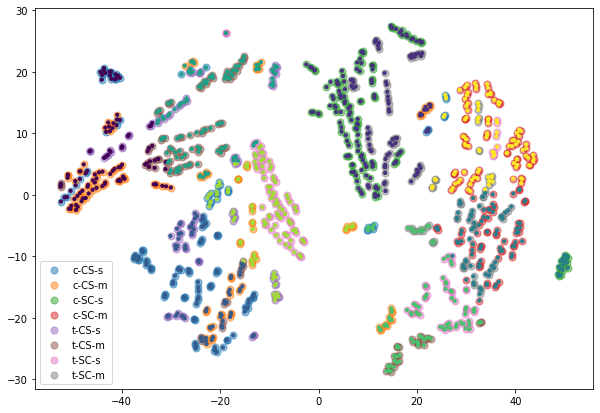

In [118]:
n_clusters = 8
k_means = sklearn.cluster.KMeans(n_clusters=n_clusters)
k_means.fit(embedding) # training
cluster = k_means.predict(embedding) # predice a cual cluster corresponde cada elmento
distance = k_means.transform(embedding) 
plt.figure(figsize=(10, 7))
for i in clase1:
    key = clase1[i]
    plt.scatter(embedding[np.where(np.asarray(Y) == key),0], 
                embedding[np.where(np.asarray(Y) == key),1], label = i, s=50.0,alpha = 0.5)
plt.scatter(embedding[:,0], embedding[:,1], c=cluster,  s=10.0)
plt.legend()


Debido a que los clusteres no estan bien definidos, se obtienen resultados erroneos al usar kmeans para hallar 8 clusters, sin embargo, se obtienen buenos resultados cuando solo las muestras únicamente se dividen en 2 grupos.